Importing the Libraries

In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the Data

In [94]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Checking the Data

In [95]:
print(f'Shape of the Dataset : {df.shape}')
print('\n')
print('Dataset Information')
print(df.info())
print('\n')
print('Empty Datapoints')
print(df.isnull().sum())

Shape of the Dataset : (569, 33)


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               

Imputing and Modifying the Data

In [96]:
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [97]:
x = x.drop(['Unnamed: 32'], axis = 1)
x = x.drop(['id'], axis = 1)

In [98]:
y.replace({'B':1, 'M':0}, inplace = True)
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Splitting the Data into Training and Testing Data

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

Standardizing the Values

In [100]:
scaler = StandardScaler()
x_trainSTD = scaler.fit_transform(x_train)
x_testSTD = scaler.transform(x_test)

Importing the ML Libraries

In [101]:
import tensorflow as tf  
tf.random.set_seed(3)
from tensorflow import keras

Defining the Model Architecture

In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid'),
])

Compiling the Model

In [103]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

Fitting the Model

In [104]:
history = model.fit(x_trainSTD, y_train, validation_split = 0.1, epochs = 100)

c:\Users\Pankaj\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1510: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 0.6319 - accuracy: 0.6259 - val_loss: 0.5729 - val_accuracy: 0.6957
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5103 - accuracy: 0.7702 - val_loss: 0.4936 - val_accuracy: 0.7391
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4332 - accuracy: 0.8680 - val_loss: 0.4353 - val_accuracy: 0.8696
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3697 - accuracy: 0.9046 - val_loss: 0.3833 - val_accuracy: 0.8696
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.9218 - val_loss: 0.3395 - val_accuracy: 0.8913
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2677 - accuracy: 0.9267 - val_loss: 0.2995 - val_accuracy: 0.8913
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9340 - val_loss: 0.2652 - val_accuracy: 0.8913
Epoch 8/100


Plotting the Loss vs Epoch

Text(0.5, 0, 'Epoch')

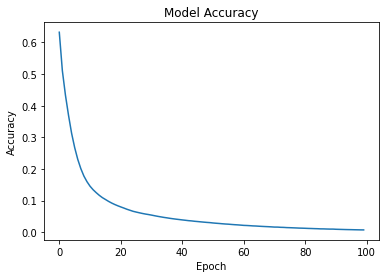

In [105]:
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Accuracy of the Model

In [106]:
loss, accuracy = model.evaluate(x_testSTD, y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9561
0.9561403393745422


Model Prediction on Testing Data

In [107]:
y_pred = model.predict(x_testSTD)

In [112]:
y_predLabels = [np.argmax(i) for i in y_pred]
print(y_predLabels)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


Building a Predicitive System

In [113]:
input_data = (10.25,16.18,66.52,324.2,0.1061,0.1111,0.06726,0.03965,0.1743,0.07279,0.3677,1.471,1.597,22.68,0.01049,0.04265,0.04004,0.01544,0.02719,0.007596,11.28,20.61,71.53,390.4,0.1402,0.236,0.1898,0.09744,0.2608,0.09702)
input_data_as_np_array = np.asarray(input_data)
input_array_reshaped = input_data_as_np_array.reshape(1,-1)
input_data_STD = scaler.transform(input_array_reshaped)
prediction = model.predict(input_data_STD)
predictionLabel = [np.argmax(prediction)]

if predictionLabel[0] == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

The tumor is Benign


c:\Users\Pankaj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
